# Comparison of Tensorflow and PyTorch

In [1]:
import tensorflow as tf
import torch
import numpy as np

In [2]:
print(torch.__version__)

0.4.0


In [3]:
print(tf.__version__)

1.5.1


### 1. Tensor initialization

#### PyTorch

In [4]:
t = torch.FloatTensor([[1, 2, 3], [4, 5, 6]])
t

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.]])

In [5]:
t.shape

torch.Size([2, 3])

In [6]:
t.size()

torch.Size([2, 3])

In [7]:
t.dtype

torch.float32

In [8]:
torch.numel(t)

6

In [9]:
t.numpy()   # zero memory-copy

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [10]:
torch.zeros(3, 3)

tensor([[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]])

In [11]:
torch.randn(3, 3)

tensor([[-1.4787,  0.6032,  0.0683],
        [ 0.9779,  1.9973,  1.0009],
        [ 1.9555, -0.0372,  1.0923]])

In [12]:
np.random.seed(1)
a = np.random.choice(6, size=9).reshape(3, 3)
torch.from_numpy(a)

tensor([[ 5,  3,  4],
        [ 0,  1,  3],
        [ 5,  0,  0]])

#### Tensorflow

In [13]:
t = tf.constant([[1, 2, 3], [4, 5, 6]], dtype=tf.float32)
t

<tf.Tensor 'Const:0' shape=(2, 3) dtype=float32>

In [14]:
t.dtype

tf.float32

In [15]:
t.shape

TensorShape([Dimension(2), Dimension(3)])

In [16]:
tf.size(t)

<tf.Tensor 'Size:0' shape=() dtype=int32>

***Note: In Tensorflow, nothing is evaluated until a session is started***

In [17]:
sess = tf.InteractiveSession()
t.eval(session=sess)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [18]:
sess = tf.InteractiveSession()
sess.run(tf.size(t))

6

In [19]:
tf.zeros([3, 3]).eval(session=sess)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [20]:
tf.random_normal([3, 3]).eval(session=sess)

array([[-0.82197493,  0.64926517, -1.6778616 ],
       [-0.42155844,  3.1852553 ,  0.93499726],
       [ 0.47332802, -0.667316  ,  1.2762054 ]], dtype=float32)

In [21]:
np.random.seed(1)
a = np.random.choice(6, size=9).reshape(3, 3)
tf.constant(a).eval(session=sess)

array([[5, 3, 4],
       [0, 1, 3],
       [5, 0, 0]])

### 2. Indexing and Slicing

#### PyTorch

In [22]:
t = torch.FloatTensor([[1, 2, 3], [4, 5, 6]])
t

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.]])

In [23]:
t[0, 0]

tensor(1.)

In [24]:
t[0, 0].item()

1.0

In [25]:
t[:, -1]

tensor([ 3.,  6.])

#### Tensorflow

In [26]:
t = tf.constant([[1, 2, 3], [4, 5, 6]], dtype=tf.float32)
t

<tf.Tensor 'Const_2:0' shape=(2, 3) dtype=float32>

In [27]:
t[0, 0].eval(session=sess)

1.0

In [28]:
t[:, -1].eval(session=sess)

array([3., 6.], dtype=float32)

### 3. Matrix Operations

In [29]:
a = np.array([[1, 2, 3], [4, 5, 6]], dtype=np.float64)
b = np.random.randn(2, 3)

#### PyTorch

In [30]:
x = torch.from_numpy(a)
x

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.]], dtype=torch.float64)

In [31]:
y = torch.from_numpy(b)
y

tensor([[-1.6017, -1.4778,  0.4835],
        [ 0.1884, -0.4647,  0.8618]], dtype=torch.float64)

In [32]:
xT = x.t()
xT

tensor([[ 1.,  4.],
        [ 2.,  5.],
        [ 3.,  6.]], dtype=torch.float64)

In [33]:
x.permute(1, 0)

tensor([[ 1.,  4.],
        [ 2.,  5.],
        [ 3.,  6.]], dtype=torch.float64)

In [34]:
# Resize/reshape
x.view(1, 6)

tensor([[ 1.,  2.,  3.,  4.,  5.,  6.]], dtype=torch.float64)

In [35]:
x + y

tensor([[-0.6017,  0.5222,  3.4835],
        [ 4.1884,  4.5353,  6.8618]], dtype=torch.float64)

In [36]:
x.mul(y)

tensor([[-1.6017, -2.9557,  1.4505],
        [ 0.7537, -2.3234,  5.1710]], dtype=torch.float64)

In [37]:
x.cross(y)

tensor([[ 5.4005, -5.2887,  1.7256],
        [ 7.0973, -2.3167, -2.8009]], dtype=torch.float64)

In [38]:
y.mm(xT)

tensor([[ -3.1069, -10.8951],
        [  1.8445,   3.6013]], dtype=torch.float64)

#### Tensorflow

In [39]:
x = tf.constant(a)
x.eval(session=sess)

array([[1., 2., 3.],
       [4., 5., 6.]])

In [40]:
y = tf.constant(b)
y.eval(session=sess)

array([[-1.601721  , -1.47782957,  0.48349585],
       [ 0.18843661, -0.46468632,  0.86182712]])

In [41]:
tf.transpose(x).eval(session=sess)

array([[1., 4.],
       [2., 5.],
       [3., 6.]])

In [42]:
xT = tf.transpose(x, perm=[1, 0])
xT.eval(session=sess)

array([[1., 4.],
       [2., 5.],
       [3., 6.]])

In [43]:
# Resize/reshape
tf.reshape(x, [1, 6]).eval(session=sess)

array([[1., 2., 3., 4., 5., 6.]])

In [44]:
x.shape, y.shape

(TensorShape([Dimension(2), Dimension(3)]),
 TensorShape([Dimension(2), Dimension(3)]))

In [45]:
(x + y).eval(session=sess)

array([[-0.601721  ,  0.52217043,  3.48349585],
       [ 4.18843661,  4.53531368,  6.86182712]])

In [46]:
tf.multiply(x, y).eval(session=sess)

array([[-1.601721  , -2.95565914,  1.45048754],
       [ 0.75374642, -2.32343162,  5.1709627 ]])

In [47]:
tf.cross(x, y).eval(session=sess)

array([[ 5.40048041, -5.28865886,  1.72561244],
       [ 7.09725353, -2.31668884, -2.80092832]])

In [48]:
tf.matmul(y, xT).eval(session=sess)

array([[ -3.1068926 , -10.89505678],
       [  1.84454531,   3.60127751]])

### 4. Creating and Evaluating Computation Graphs

#### PyTorch

In [49]:
# Create and evaluate computation graph.
a = torch.Tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = torch.Tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = a.mm(b)
c

tensor([[ 22.,  28.],
        [ 49.,  64.]])

#### Tensorflow

In [50]:
# 1. Create a computation graph.
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]], name='a')
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]], name='b')
c = tf.matmul(a, b)

In [51]:
# 2. Create a session
sess = tf.Session()

In [52]:
# 3. Evaluate the graph
print(sess.run(c))

[[22. 28.]
 [49. 64.]]


### 5. Computing Gradients (Automatic Differentiation)

Suppose we have the following:
    
$$A = \frac{1}{n}\sum_i\sum_jz_{ij}^2$$

where

$$Z = W.X$$

(A, W, X, and Z are matrices)
and we want to evaluate the derivatives with respect to each $w_{ij}$:

$$\frac{dA}{dw_{ij}}$$

### PyTorch

In [53]:
# Create and evaluate computation graph.
w = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]], requires_grad=True)
x = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
z = w.mm(x)
a = (z**2).sum()/4
a

tensor(1941.2500)

In [54]:
w.requires_grad, x.requires_grad, z.requires_grad

(True, False, True)

In [55]:
z.grad_fn, a.grad_fn

(<MmBackward at 0xb229af6d8>, <DivBackward0 at 0xb229af198>)

In [56]:
# Back-propagation
a.backward()

In [57]:
# Display gradients (dA/dW)
w.grad

tensor([[  39.0000,   89.0000,  139.0000],
        [  88.5000,  201.5000,  314.5000]])

### Tensorflow

In [58]:
# 1. Create a computation graph.
w = tf.placeholder(dtype=tf.float64, shape=(2,3), name='w')
x = tf.placeholder(dtype=tf.float64, shape=(3,2), name='x')
z = tf.matmul(w, x)
a = tf.reduce_sum(z**2)/4

In [59]:
# 2. Create a session
sess = tf.Session()

In [60]:
# 3. Evaluate the graph
w_init = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
data = np.array([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

print(sess.run(a, feed_dict={w: w_init, x: data}))

1941.25


In [61]:
# 4. Evaluate gradients (dA/dW)
grad = tf.gradients(a, w)
print(sess.run(grad, feed_dict={w: w_init, x: data}))

[array([[ 39. ,  89. , 139. ],
       [ 88.5, 201.5, 314.5]])]


### Using GPUs

#### PyTorch

In [62]:
if torch.cuda.is_available():
    gpu_list = {i: torch.cuda.get_device_name(i) for i in 
                range(torch.cuda.device_count())}
    print("Using GPUs:\n", gpu_list)
else:
    print("Using CPU")

Using CPU


In [63]:
a = torch.Tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = torch.Tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

if torch.cuda.is_available():
    device = torch.device("cuda")
    a = a.to(device)  # or simply a.cuda()
    b = b.to(device)  # or simply b.cuda()

c = a.mm(b)
c = c.to("cpu")

In [64]:
a.device, b.device, c.device

(device(type='cpu'), device(type='cpu'), device(type='cpu'))

#### Tensorflow

For any TensorFlow operation that has both CPU and GPU implementations, GPU devices will be given priority.  For example, on a system with device names `'cpu:0'` and `'gpu:0'`, `'gpu:0'` will be selected to run `matmul`.

To check that the correct devices visible to TF use this

In [65]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6111873932871030639
]


To run an operation on a device of your choice instead of what's automatically selected for you, you can use `with tf.device` to create a device context such that all the operations within that context will have the same device assignment.  If you create the session with `log_device_placement` configuration option set to `True` you will see output in the console (not in the Jupyter notebook) showing what devices your operations and tensors are assigned to.

In [66]:
# Creates a graph.
with tf.device('/cpu:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print(sess.run(c))

[[22. 28.]
 [49. 64.]]


Typical output in console:

``` Text
2018-05-16 11:41:31.392516: I tensorflow/core/common_runtime/direct_session.cc:297] Device mapping:

MatMul_29: (MatMul): /job:localhost/replica:0/task:0/device:CPU:0
2018-05-16 11:41:31.409681: I tensorflow/core/common_runtime/placer.cc:874] MatMul_29: (MatMul)/job:localhost/replica:0/task:0/device:CPU:0
MatMul_28: (MatMul): /job:localhost/replica:0/task:0/device:CPU:0
2018-05-16 11:41:31.409698: I tensorflow/core/common_runtime/placer.cc:874] MatMul_28: (MatMul)/job:localhost/replica:0/task:0/device:CPU:0
MatMul_27: (MatMul): /job:localhost/replica:0/task:0/device:CPU:0
```
...etc.


## Example Application: Neural net for classifying handwritten digits (MNIST dataset)

In [67]:
import matplotlib.pyplot as plt

%matplotlib inline

### Pytorch

This example uses the LeNet architecture.

Based on Chris Finlay's example code:
https://github.com/cfinlay/PyTorch-HelloWorld

In [170]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

It uses [TorchNet](https://github.com/pytorch/tnt) which is a library providing powerful dataloading, logging and visualization utlities for Python. It is closely intergrated with PyTorch and is designed to enable rapid iteration with any model or training regimen.

In [171]:
import torchnet as tnt

In [172]:
class args:
    pass

args.cuda =  torch.cuda.is_available()
args.batch_size = 128
args.epochs = 5
args.lr = 0.1
args.dropout = 0.25
args.momentum = 0.9
args.data_dir = './data'

# Print out arguments to the log
print('Training LeNet on MNIST')
for p in vars(args).items():
    print('  ',p[0]+': ',p[1])
print('\n')

Training LeNet on MNIST
   __module__:  __main__
   __dict__:  <attribute '__dict__' of 'args' objects>
   __weakref__:  <attribute '__weakref__' of 'args' objects>
   __doc__:  None
   cuda:  False
   batch_size:  128
   epochs:  5
   lr:  0.1
   dropout:  0.25
   momentum:  0.9
   data_dir:  ./data




In [173]:
# Load and pre-process the MNIST dataset
mnist_dataset_train = datasets.MNIST(
    args.data_dir, 
    train=True, 
    transform=transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((0.1307,), (0.3081,))]), 
    download=True
)

mnist_dataset_test = datasets.MNIST(
    args.data_dir, 
    train=False, 
    transform=transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((0.1307,), (0.3081,))]), 
    download=True
)

In [174]:
# Define data loaders to generate batches
kwargs = {'num_workers': 1, 'pin_memory': True} if args.cuda else {}

train_loader = torch.utils.data.DataLoader(
    mnist_dataset_train,
    batch_size=args.batch_size, 
    shuffle=True, 
    **kwargs)

test_loader = torch.utils.data.DataLoader(
    mnist_dataset_test,
    batch_size=1000, # Why not len(mnist_dataset_test) or 10000?
    shuffle=True, 
    **kwargs)

In [256]:
len(mnist_dataset_test)

10000

In [175]:
# define network architecture

class View(nn.Module):

    def __init__(self, o):
        super(View, self).__init__()
        self.o = o

    def forward(self, x):
        return x.view(-1, self.o)

class LeNet(nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()

        def convbn(ci, co, ksz, psz, p):
            return nn.Sequential(
                nn.Conv2d(ci, co, ksz),
                nn.BatchNorm2d(co),
                nn.ReLU(True),
                nn.MaxPool2d(psz, stride=psz),
                nn.Dropout(p))

        self.m = nn.Sequential(
            convbn(1, 20, 5, 3, args.dropout),
            convbn(20, 50, 5, 2, args.dropout),
            View(50*2*2),
            nn.Linear(50*2*2, 500),
            nn.BatchNorm1d(500),
            nn.ReLU(True),
            nn.Dropout(args.dropout),
            nn.Linear(500, 10))

    def forward(self, x):
        return self.m(x)

In [176]:
model = LeNet()
print(model)

LeNet(
  (m): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
      (1): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
      (4): Dropout(p=0.25)
    )
    (1): Sequential(
      (0): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
      (1): BatchNorm2d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): Dropout(p=0.25)
    )
    (2): View()
    (3): Linear(in_features=200, out_features=500, bias=True)
    (4): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): Dropout(p=0.25)
    (7): Linear(in_features=500, out_features=10, bias=True)
  )
)


In [188]:
# Another example of a similar network

import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [189]:
# Initialize network
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [190]:
params = list(model.parameters())
print("Parameters:")
for i, p in enumerate(params):
    print(i, p.size())

Parameters:
0 torch.Size([20, 1, 5, 5])
1 torch.Size([20])
2 torch.Size([20])
3 torch.Size([20])
4 torch.Size([50, 20, 5, 5])
5 torch.Size([50])
6 torch.Size([50])
7 torch.Size([50])
8 torch.Size([500, 200])
9 torch.Size([500])
10 torch.Size([500])
11 torch.Size([500])
12 torch.Size([10, 500])
13 torch.Size([10])


In [180]:
# Define loss function
loss_function = nn.CrossEntropyLoss()

# Move model and loss function to GPU if available
if args.cuda:
    model.cuda()
    loss_function.cuda()

# Select optimizer
optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)

# Function to train one epoch
def train(epoch):
    model.train() # sets the module in training mode
    for batch_ix, (data, target) in enumerate(train_loader):
        if args.cuda:
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()
        if batch_ix % 100 == 0 and batch_ix>0:
            print('[Epoch %2d, batch %3d] training loss: %.4f' %
                (epoch, batch_ix, loss.data[0]))

In [250]:
# function for evaluating the model on the test data
def test():
    model.eval() # turn off training mode

    test_loss = tnt.meter.AverageValueMeter()
    top1 = tnt.meter.ClassErrorMeter()
    for data, target in test_loader:
        if args.cuda:
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data, volatile=True), Variable(target)
        predictions = model(data)
        loss = loss_function(predictions, target)

        top1.add(predictions.data, target.data)
        test_loss.add(loss.data[0])

    print('[Epoch %2d] Average test loss: %.3f, accuracy: %.2f%%\n'
        %(epoch, test_loss.value()[0], 1 - top1.value()[0]))

In [182]:
# Carry out training
for epoch in range(1, args.epochs + 1):
    train(epoch)
    test()

/Users/billtubbs/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:26: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


[Epoch  1, batch 100] training loss: 0.1753
[Epoch  1, batch 200] training loss: 0.1088
[Epoch  1, batch 300] training loss: 0.0385
[Epoch  1, batch 400] training loss: 0.0776


/Users/billtubbs/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:9: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/Users/billtubbs/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:14: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


[Epoch  1] Average test loss: 0.047, accuracy: 1.42%

[Epoch  2, batch 100] training loss: 0.1243
[Epoch  2, batch 200] training loss: 0.1098
[Epoch  2, batch 300] training loss: 0.1123
[Epoch  2, batch 400] training loss: 0.0631
[Epoch  2] Average test loss: 0.032, accuracy: 1.10%

[Epoch  3, batch 100] training loss: 0.0312
[Epoch  3, batch 200] training loss: 0.0462
[Epoch  3, batch 300] training loss: 0.0818
[Epoch  3, batch 400] training loss: 0.0727
[Epoch  3] Average test loss: 0.032, accuracy: 0.92%

[Epoch  4, batch 100] training loss: 0.0863
[Epoch  4, batch 200] training loss: 0.0647
[Epoch  4, batch 300] training loss: 0.0764
[Epoch  4, batch 400] training loss: 0.0984
[Epoch  4] Average test loss: 0.025, accuracy: 0.72%

[Epoch  5, batch 100] training loss: 0.1449
[Epoch  5, batch 200] training loss: 0.0377
[Epoch  5, batch 300] training loss: 0.0254
[Epoch  5, batch 400] training loss: 0.0233
[Epoch  5] Average test loss: 0.025, accuracy: 0.74%



i: 9866
Prediction: 4
Truth: 4


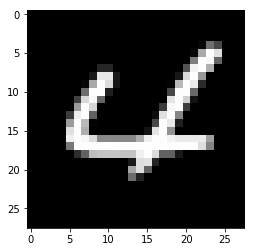

In [248]:
# Make predictions on examples from test set
model.eval()  # Turn off training mode
i = np.random.randint(len(mnist_dataset_test))
image, label = mnist_dataset_test[i]
yi = model(image.unsqueeze(0)).argmax().numpy() # input dimensions: nSamples x nChannels x Height x Width
print("i:", i)
print("Prediction:", yi)
print("Truth:", label.numpy())
ax = plt.imshow(image[0,:,:], cmap='gray')

In [251]:
# Function to evaluate and return results for error analysis
def test_results(data, target):
    model.eval() # turn off training mode
    
    results = []
    test_loss = tnt.meter.AverageValueMeter()
    top1 = tnt.meter.ClassErrorMeter()

    if args.cuda:
        data, target = data.cuda(), target.cuda()
        
    data, target = Variable(data, volatile=True), Variable(target)
    
    predictions = model(data)
    correct = output == target[:, np.newaxis].repeat(pred.shape[1], 1)

    loss = loss_function(predictions, target)

    test_loss = top1.add(predictions.data, target.data)
    accuracy = test_loss.add(loss.data[0])
    
    return test_loss, accuracy, correct

In [255]:
help(mnist_dataset_test)

Help on MNIST in module torchvision.datasets.mnist object:

class MNIST(torch.utils.data.dataset.Dataset)
 |  `MNIST <http://yann.lecun.com/exdb/mnist/>`_ Dataset.
 |  
 |  Args:
 |      root (string): Root directory of dataset where ``processed/training.pt``
 |          and  ``processed/test.pt`` exist.
 |      train (bool, optional): If True, creates dataset from ``training.pt``,
 |          otherwise from ``test.pt``.
 |      download (bool, optional): If true, downloads the dataset from the internet and
 |          puts it in root directory. If dataset is already downloaded, it is not
 |          downloaded again.
 |      transform (callable, optional): A function/transform that  takes in an PIL image
 |          and returns a transformed version. E.g, ``transforms.RandomCrop``
 |      target_transform (callable, optional): A function/transform that takes in the
 |          target and transforms it.
 |  
 |  Method resolution order:
 |      MNIST
 |      torch.utils.data.dataset.Da

In [252]:
test_loss, accuracy, correct = test_results(mnist_dataset_test)

TypeError: test_results() missing 1 required positional argument: 'target'

In [ ]:
prediction = tf.argmax(y, 1)
correct_prediction = tf.equal(prediction, tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
# Error analysis
errors = np.invert(
    correct_prediction.eval(session=sess, 
                             feed_dict={x: mnist.test.images, y_: mnist.test.labels})
)
errors.sum()

In [121]:
input("Press enter to continue")

Press enter to continue


''

### Tensorflow

The code here is based on the example in the Tensorflow documentation https://www.tensorflow.org/versions/r1.0/get_started/mnist/beginners

In [122]:
# Load MNIST training data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


The MNIST data is split into three parts:
1. 55,000 data points of training data (mnist.train)
2. 10,000 points of test data (mnist.test)
3. 5,000 points of validation data (mnist.validation).

In [123]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [124]:
type(mnist.train.images)

numpy.ndarray

`mnist.train.images` is a tensor (an n-dimensional array) with a shape of [55000, 784]. The first dimension is an index into the list of images and the second dimension is the index for each pixel in each image.

In [125]:
mnist.train.images[0].shape

(784,)

A one-hot vector is a vector which is 0 in most dimensions, and 1 in a single dimension. In this case, the $i$th digit will be represented as a vector which is 1 in the $i$th dimension. 

For example, 3 would be `[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]`. 

Therefore, `mnist.train.labels` is a `[55000, 10]` array of floats.

In [ ]:
# Display an example of one image
i = 0
print(mnist.train.labels[i])
ax = plt.imshow(mnist.train.images[i].reshape((28, 28)), cmap='gray')

In [127]:
# Tensor for input vector
x = tf.placeholder(tf.float32, [None, 784])

# Tensor for weights and biases
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [128]:
# Network outputs (predictions)
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [129]:
# Placeholder for correct labels
y_ = tf.placeholder(tf.float32, [None, 10])

In [130]:
# Loss function ("cross-entropy")
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

# The following is more numerically stable than above:
# cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))

In [131]:
# Define training method
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [132]:
# Start a session
sess = tf.InteractiveSession()

# Initialize variables
tf.global_variables_initializer().run()

In [133]:
# Training
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [134]:
# Define a scoring mechanism
prediction = tf.argmax(y, 1)
correct_prediction = tf.equal(prediction, tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [135]:
# Calculate accuracy on test set
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9204


i: 6742
Prediction: 4
Truth: 4


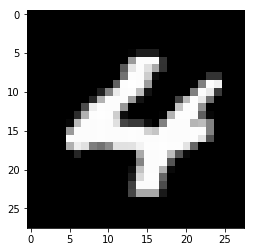

In [136]:
# Make predictions on examples from test set
i = np.random.randint(len(mnist.test.images))
yi = prediction.eval(
    session=sess, 
    feed_dict={x: mnist.test.images[i].reshape(1, -1)}
).tolist()[0]
print("i:", i)
print("Prediction:", yi)
print("Truth:", mnist.test.labels[i:i+1].argmax())
ax = plt.imshow(mnist.test.images[i].reshape((28, 28)), cmap='gray')

In [137]:
# Error analysis
errors = np.invert(
    correct_prediction.eval(session=sess, 
                             feed_dict={x: mnist.test.images, y_: mnist.test.labels})
)
errors.sum()

796

In [138]:
# List of incorrect predictions
error_indices = np.where(errors)[0]
error_indices[0:10]

array([  8,  33,  46,  63,  66,  77,  92, 124, 149, 193])

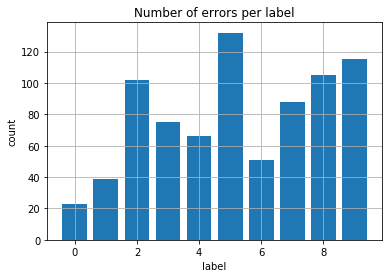

In [139]:
plt.bar(range(10), np.bincount(np.argmax(mnist.test.labels[errors], 1)))
plt.title("Number of errors per label")
plt.xlabel('label')
plt.ylabel('count')
plt.grid()

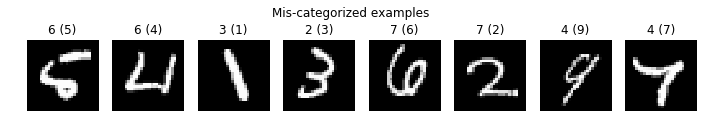

In [140]:
fig, axes = plt.subplots(1, 8, figsize=(12,2))

for i, ax in zip(error_indices[0:8], axes):
    ax.imshow(mnist.test.images[i].reshape((28, 28)), cmap='gray')
    y_hat = prediction.eval(
        session=sess, 
        feed_dict={x: mnist.test.images[i].reshape(1, -1)}
    ).tolist()[0]
    text = "{} ({})".format(y_hat, mnist.test.labels[i:i+1].argmax())
    ax.set_title(text)
    ax.axis('off') 

fig.suptitle("Mis-categorized examples")
plt.show()

In [141]:
input("Press enter to continue")

Press enter to continue


''

### Keras

Based on example from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

In [142]:
# import the necessary packages
import keras
from keras.datasets import mnist
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [143]:
type(mnist)

module

In [144]:
# input data dimensions
img_rows, img_cols = 28, 28
num_classes = 10

In [145]:
# Training parameters
batch_size = 128
epochs = 5

In [146]:
# Load the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [147]:
# Reshape data
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [148]:
# Preprocess data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [149]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [150]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [151]:
# Build model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [152]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [153]:
#Training - THIS CAN TAKE SOME TIME!
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 105s 2ms/step - loss: 0.2611 - acc: 0.9192 - val_loss: 0.0563 - val_acc: 0.9812

In [154]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.029703008790765307
Test accuracy: 0.9899


In [155]:
# serialize model to JSON file
model_json = model.to_json()
with open("keras_model.json", "w") as json_file:
    json_file.write(model_json)

In [156]:
# serialize weights to HDF5 file
model.save_weights("keras_model_weights.h5")

In [157]:
# Load model and weights
json_file = open('keras_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("keras_model_weights.h5")

In [158]:
loaded_model.compile(loss=keras.losses.categorical_crossentropy,
                    optimizer=keras.optimizers.Adadelta(),
                    metrics=['accuracy'])

In [159]:
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.029703008790765307
Test accuracy: 0.9899


i: 7162
Prediction: 0
Truth: 0


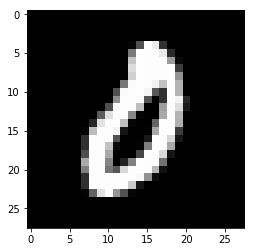

In [160]:
# Make predictions on test set
i = np.random.randint(len(x_test))
print("i:", i)
print("Prediction:", model.predict_classes(x_test[i:i+1]).tolist()[0])
print("Truth:", y_test[i:i+1].argmax())
ax = plt.imshow(x_test[i].reshape((28, 28)), cmap='gray')

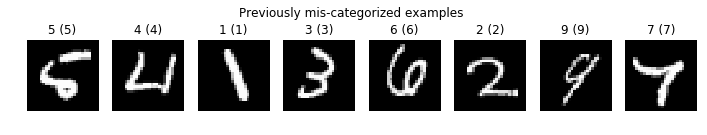

In [161]:
# Compare predictions to previous model
fig, axes = plt.subplots(1, 8, figsize=(12,2))

for i, ax in zip(error_indices[0:8], axes):
    ax.imshow(x_test[i].reshape((28, 28)), cmap='gray')
    y_hat = model.predict_classes(x_test[i:i+1]).tolist()[0]
    text = "{} ({})".format(y_hat, y_test[i:i+1].argmax())
    ax.set_title(text)
    ax.axis('off') 

fig.suptitle("Previously mis-categorized examples")
plt.show()

In [162]:
input("Press enter to continue")

Press enter to continue


''

In [163]:
del x_train, y_train, x_test, y_test